In [19]:
from vector_operations import Vector, dot;

In [3]:
def sum_of_squares(v: Vector) -> float:
    """Computes the sum of squared elements in v"""
    return dot(v,v)

In [6]:
from typing import Callable
def difference_quotient(f: Callable[[float],float],
                       x: float,
                       h: float) -> float:
    return (f(x+h) - f(x))/h

In [7]:
def square(x: float) -> float:
    return x*x

def derivative(x: float) -> float:
    return 2*x

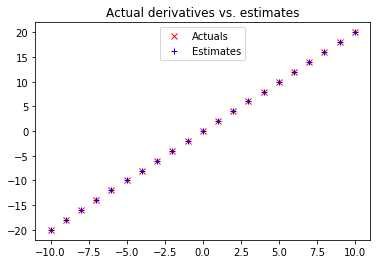

In [10]:
xs = range(-10,11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square,x, h = 0.001) for x in xs]

import matplotlib.pyplot as plt
plt.title("Actual derivatives vs. estimates")
plt.plot(xs, actuals, 'rx',label = 'Actuals')
plt.plot(xs, estimates, 'b+',  label = 'Estimates')
plt.legend(loc = 9)
plt.show()

In [12]:
def partial_difference_quotient(f: Callable[[float],float],
                                v: Vector,
                                i: int,
                                h: float) -> float:
    """Return the partial difference quotient in i-th direction"""
    # Compute the next point in i-th direction
    w = [v_j + (h if i == j else 0) for j, v_j in enumerate(v)]
    return (f(w) - f(v))/h

def estimate_gradient(f: Callable[[float], float],
                      v: Vector,
                      h: float = 0.0001) -> Vector:
    return [partial_difference_quotient(f, v, i, h) 
            for i in range(len(v))]

In [31]:
from vector_operations import scalar_mulitply, distance, add
import random
def gradient_step(v: Vector, 
                  gradient: Vector, 
                  step_size: float) -> Vector:
    """Moves 'step size' in the 'gradient' direction of v"""
    assert len(v) == len(gradient)
    return add(v, scalar_mulitply(step_size, gradient))
# create a gradient function (d(x**2)/dx = 2*x )
def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2*v_i for v_i in v]
    
# pick a random starting point
v = [random.uniform(-10,10) for i in range(3)]

for epoch in range(1000):
    # compute gradient
    grad = sum_of_squares_gradient(v)
    # update vector in the gradient direction
    v = gradient_step(v, grad, step_size = -0.01) # take a step in the negative gradient direction
    print(epoch, v)
 
print("Distance = ",distance(v,[0,0,0]))

assert distance(v,[0,0,0]) < 0.001 # v should be close to zero

0 [-7.795745666644516, -0.8458927648491671, 3.5781534990951624]
1 [-7.639830753311625, -0.8289749095521838, 3.5065904291132592]
2 [-7.487034138245393, -0.8123954113611401, 3.436458620530994]
3 [-7.337293455480485, -0.7961475031339174, 3.3677294481203743]
4 [-7.190547586370876, -0.7802245530712391, 3.3003748591579667]
5 [-7.046736634643459, -0.7646200620098142, 3.2343673619748072]
6 [-6.905801901950589, -0.749327660769618, 3.1696800147353112]
7 [-6.767685863911577, -0.7343411075542257, 3.106286414440605]
8 [-6.632332146633345, -0.7196542854031411, 3.044160686151793]
9 [-6.499685503700679, -0.7052611996950783, 2.983277472428757]
10 [-6.369691793626665, -0.6911559757011767, 2.9236119229801822]
11 [-6.242297957754132, -0.6773328561871532, 2.8651396845205785]
12 [-6.117451998599049, -0.6637861990634102, 2.807836890830167]
13 [-5.995102958627068, -0.650510475082142, 2.7516801530135635]
14 [-5.875200899454526, -0.6375002655804991, 2.696646549953292]
15 [-5.757696881465436, -0.6247502602688891

In [43]:
"""Using the gradient descent algorith to find the slope and intercept of a linear equation"""
# Create a linear equation with know parameters (slope = 20, intercept = 5)
input = [(x, 20*x + 5) for x in range(-50,50)]

def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope*x + intercept # prediction of a linear model
    error = (predicted - y)
    squared_error = error**2 # minimize squared error
    grad = [2*error*x, 2*error] # using its gradient
    return grad

from vector_operations import vector_mean
# start with a random slope and intercept
theta = [random.uniform(-1,1), random.uniform(-1,1)]

learning_rate = 0.001

for epoch in range(5000):
    # compute mean of the gradients
    grad = vector_mean([linear_gradient(x,y, theta) for x,y in input])
    # Take a step in that direction
    theta = gradient_step(theta, grad,-learning_rate)
    print(epoch, theta)
    
slope, intercept = theta
assert 19.9 < slope < 20.1 # slope should be close to 20
assert 4.9 < intercept  < 5.1 # intercept should be close to 5

0 [33.02571613215829, -0.13854900200751996]
1 [11.306708790848418, -0.11524618787134677]
2 [25.79330999031623, -0.11370898670475557]
3 [16.130748527472363, -0.09768825874102985]
4 [22.57569304391719, -0.09136213369607538]
5 [18.276921377573537, -0.07860371638476607]
6 [21.144214837442068, -0.07016958757442299]
7 [19.23173853383857, -0.058885033561832084]
8 [20.50737151289611, -0.049535524960869826]
9 [19.656533665373335, -0.03892908239805194]
10 [20.224053116113588, -0.02919469056788255]
11 [19.845527376861668, -0.018912248070633166]
12 [20.098014327385197, -0.009028896197630264]
13 [19.929615414737878, 0.0010871759221501593]
14 [20.041947605545758, 0.011014616985043722]
15 [19.967031961717964, 0.02103453535661944]
16 [20.017010716069475, 0.030959498247624152]
17 [19.983684811879908, 0.04091458996719838]
18 [20.00592314506607, 0.05081644559914388]
19 [19.99110007868653, 0.06072073585301167]
20 [20.00099696825194, 0.07059039445999218]
21 [19.994405612570418, 0.08045021063932419]
22 [19.

531 [19.998935316665868, 3.227301609222681]
532 [19.99893744539309, 3.2308459413209016]
533 [19.99893956986413, 3.234383186883653]
534 [19.99894169008751, 3.23791336007975]
535 [19.99894380607171, 3.2414364750496776]
536 [19.998945917825218, 3.24495254590565]
537 [19.998948025356487, 3.248461586731664]
538 [19.998950128673954, 3.251963611583557]
539 [19.998952227786056, 3.255458634489064]
540 [19.99895432270119, 3.2589466694478717]
541 [19.998956413427752, 3.262427730431677]
542 [19.998958499974123, 3.2659018313842414]
543 [19.998960582348644, 3.2693689862214472]
544 [19.998962660559677, 3.272829208831353]
545 [19.998964734615527, 3.27628251307425]
546 [19.998966804524517, 3.279728912782717]
547 [19.99896887029493, 3.283168421761676]
548 [19.998970931935045, 3.2866010537884476]
549 [19.998972989453115, 3.2900268226128055]
550 [19.998975042857385, 3.293445741957033]
551 [19.998977092156082, 3.296857825515976]
552 [19.99897913735741, 3.3002630869571004]
553 [19.998981178469567, 3.3036615

1107 [19.999663827037864, 4.440271816140527]
1108 [19.999664499181886, 4.441390936335283]
1109 [19.999665169982016, 4.442507818961794]
1110 [19.999665839440958, 4.443622468493853]
1111 [19.999666507561376, 4.444734889396306]
1112 [19.99966717434596, 4.445845086125075]
1113 [19.99966783979737, 4.446953063127171]
1114 [19.99966850391828, 4.448058824840714]
1115 [19.99966916671135, 4.44916237569495]
1116 [19.999669828179226, 4.4502637201102715]
1117 [19.999670488324565, 4.45136286249823]
1118 [19.999671147150014, 4.452459807261558]
1119 [19.999671804658202, 4.453554558794185]
1120 [19.999672460851773, 4.454647121481255]
1121 [19.999673115733348, 4.455737499699144]
1122 [19.999673769305556, 4.456825697815479]
1123 [19.999674421571008, 4.457911720189154]
1124 [19.999675072532327, 4.458995571170346]
1125 [19.99967572219211, 4.460077255100538]
1126 [19.999676370552965, 4.461156776312529]
1127 [19.999677017617486, 4.462234139130457]
1128 [19.99967766338827, 4.463309347869814]
1129 [19.99967830

1589 [19.99987188214558, 4.786683695445581]
1590 [19.999872138304344, 4.787110199936835]
1591 [19.99987239395094, 4.787535851675266]
1592 [19.9998726490864, 4.787960652365867]
1593 [19.999872903711736, 4.788384603710222]
1594 [19.99987315782798, 4.788807707406513]
1595 [19.999873411436145, 4.789229965149528]
1596 [19.99987366453724, 4.789651378630666]
1597 [19.99987391713229, 4.790071949537942]
1598 [19.9998741692223, 4.790491679555998]
1599 [19.999874420808283, 4.790910570366108]
1600 [19.99987467189124, 4.7913286236461845]
1601 [19.999874922472188, 4.791745841070783]
1602 [19.999875172552123, 4.792162224311114]
1603 [19.999875422132046, 4.792577775035044]
1604 [19.99987567121296, 4.792992494907105]
1605 [19.999875919795866, 4.793406385588504]
1606 [19.999876167881744, 4.793819448737123]
1607 [19.999876415471615, 4.794231686007531]
1608 [19.99987666256644, 4.794643099050988]
1609 [19.999876909167234, 4.795053689515452]
1610 [19.99987715527497, 4.795463459045588]
1611 [19.9998774008906

2029 [19.9999468916484, 4.911574562685338]
2030 [19.999946997833202, 4.911751360451616]
2031 [19.999947103805706, 4.9119278047285455]
2032 [19.999947209566322, 4.912103896222894]
2033 [19.999947315115485, 4.912279635640015]
2034 [19.999947420453612, 4.912455023683851]
2035 [19.999947525581124, 4.9126300610569364]
2036 [19.999947630498447, 4.912804748460403]
2037 [19.999947735205996, 4.912979086593981]
2038 [19.999947839704195, 4.913153076155999]
2039 [19.999947943993458, 4.9133267178433915]
2040 [19.999948048074206, 4.913500012351698]
2041 [19.999948151946857, 4.913672960375069]
2042 [19.999948255611823, 4.913845562606266]
2043 [19.99994835906952, 4.9140178197366655]
2044 [19.999948462320365, 4.914189732456261]
2045 [19.99994856536477, 4.91436130145367]
2046 [19.99994866820315, 4.914532527416127]
2047 [19.999948770835914, 4.914703411029498]
2048 [19.999948873263474, 4.914873952978275]
2049 [19.99994897548624, 4.915044153945582]
2050 [19.999949077504624, 4.915214014613177]
2051 [19.9999

2530 [19.999980515245053, 4.967557871310339]
2531 [19.99998055420286, 4.967622736082963]
2532 [19.999980593082775, 4.967687471165]
2533 [19.999980631884956, 4.967752076815753]
2534 [19.99998067060955, 4.967816553294006]
2535 [19.999980709256725, 4.967880900858027]
2536 [19.999980747826623, 4.967945119765568]
2537 [19.99998078631941, 4.9680092102738636]
2538 [19.99998082473523, 4.968073172639635]
2539 [19.999980863074242, 4.968137007119092]
2540 [19.9999809013366, 4.968200713967928]
2541 [19.999980939522455, 4.968264293441329]
2542 [19.999980977631964, 4.968327745793968]
2543 [19.999981015665274, 4.968391071280013]
2544 [19.99998105362254, 4.968454270153118]
2545 [19.99998109150392, 4.968517342666434]
2546 [19.999981129309553, 4.968580289072605]
2547 [19.9999811670396, 4.96864310962377]
2548 [19.999981204694212, 4.968705804571562]
2549 [19.99998124227353, 4.968768374167113]
2550 [19.99998127977772, 4.968830818661052]
2551 [19.99998131720692, 4.968893138303508]
2552 [19.99998135456129, 4

2785 [19.99998830366972, 4.980525603061808]
2786 [19.99998832705536, 4.980564540159354]
2787 [19.999988350394236, 4.980603399406091]
2788 [19.99998837368645, 4.980642180957672]
2789 [19.999988396932096, 4.980680884969443]
2790 [19.99998842013126, 4.980719511596436]
2791 [19.999988443284046, 4.980758060993375]
2792 [19.999988466390533, 4.980796533314672]
2793 [19.99998848945083, 4.980834928714433]
2794 [19.999988512465013, 4.980873247346455]
2795 [19.999988535433182, 4.980911489364227]
2796 [19.999988558355433, 4.980949654920932]
2797 [19.999988581231847, 4.980987744169445]
2798 [19.999988604062526, 4.981025757262338]
2799 [19.999988626847557, 4.981063694351875]
2800 [19.99998864958703, 4.981101555590019]
2801 [19.99998867228104, 4.981139341128426]
2802 [19.999988694929673, 4.98117705111845]
2803 [19.999988717533025, 4.981214685711143]
2804 [19.999988740091183, 4.981252245057253]
2805 [19.99998876260424, 4.98128972930723]
2806 [19.99998878507228, 4.98132713861122]
2807 [19.9999888074954

2994 [19.999992301832144, 4.987182545893218]
2995 [19.999992317223853, 4.987208173103264]
2996 [19.999992332584792, 4.9872337490742815]
2997 [19.99999234791502, 4.987259273908718]
2998 [19.99999236321459, 4.987284747708816]
2999 [19.999992378483576, 4.987310170576612]
3000 [19.99999239372203, 4.987335542613943]
3001 [19.99999240893002, 4.987360863922437]
3002 [19.9999924241076, 4.987386134603523]
3003 [19.999992439254836, 4.987411354758423]
3004 [19.99999245437178, 4.987436524488161]
3005 [19.99999246945851, 4.987461643893557]
3006 [19.99999248451507, 4.987486713075228]
3007 [19.999992499541523, 4.9875117321335924]
3008 [19.999992514537936, 4.9875367011688665]
3009 [19.999992529504365, 4.987561620281067]
3010 [19.99999254444087, 4.987586489570009]
3011 [19.999992559347508, 4.98761130913531]
3012 [19.999992574224347, 4.9876360790763865]
3013 [19.999992589071436, 4.987660799492458]
3014 [19.999992603888845, 4.987685470482544]
3015 [19.99999261867662, 4.987710092145468]
3016 [19.999992633

3431 [19.99999678968141, 4.994654817620889]
3432 [19.99999679610012, 4.994665504775329]
3433 [19.999996802505994, 4.994676170561878]
3434 [19.999996808899063, 4.99468681502326]
3435 [19.99999681527935, 4.994697438202112]
3436 [19.999996821646874, 4.994708040140988]
3437 [19.999996828001677, 4.994718620882352]
3438 [19.999996834343765, 4.994729180468589]
3439 [19.999996840673177, 4.994739718941996]
3440 [19.999996846989934, 4.994750236344785]
3441 [19.99999685329406, 4.994760732719086]
3442 [19.999996859585583, 4.9947712081069415]
3443 [19.999996865864524, 4.994781662550313]
3444 [19.99999687213091, 4.994792096091077]
3445 [19.999996878384774, 4.994802508771025]
3446 [19.99999688462613, 4.994812900631868]
3447 [19.999996890855005, 4.994823271715231]
3448 [19.999996897071426, 4.9948336220626555]
3449 [19.99999690327542, 4.994843951715602]
3450 [19.99999690946701, 4.994854260715446]
3451 [19.999996915646218, 4.9948645491034815]
3452 [19.999996921813075, 4.9948748169209205]
3453 [19.999996

3941 [19.99999884320212, 4.998073930836362]
3942 [19.999998845515023, 4.998077781817892]
3943 [19.999998847823296, 4.998081625099771]
3944 [19.99999885012696, 4.998085460697395]
3945 [19.999998852426014, 4.998089288626127]
3946 [19.999998854720474, 4.9980931089013]
3947 [19.999998857010347, 4.9980969215382185]
3948 [19.999998859295637, 4.998100726552153]
3949 [19.999998861576362, 4.998104523958344]
3950 [19.999998863852525, 4.998108313772003]
3951 [19.999998866124137, 4.998112096008311]
3952 [19.99999886839121, 4.998115870682419]
3953 [19.999998870653744, 4.998119637809445]
3954 [19.99999887291176, 4.9981233974044805]
3955 [19.99999887516526, 4.998127149482583]
3956 [19.999998877414253, 4.998130894058783]
3957 [19.99999887965875, 4.99813463114808]
3958 [19.99999888189876, 4.998138360765442]
3959 [19.999998884134293, 4.99814208292581]
3960 [19.999998886365354, 4.998145797644092]
3961 [19.999998888591954, 4.998149504935169]
3962 [19.9999988908141, 4.998153204813891]
3963 [19.999998893031

4434 [19.99999956873602, 4.9992819452103445]
4435 [19.999999569598284, 4.99928338088866]
4436 [19.999999570458833, 4.999284813696481]
4437 [19.999999571317655, 4.999286243639547]
4438 [19.999999572174765, 4.999287670723586]
4439 [19.999999573030156, 4.999289094954314]
4440 [19.99999957388384, 4.999290516337435]
4441 [19.999999574735817, 4.999291934878644]
4442 [19.999999575586088, 4.999293350583622]
4443 [19.999999576434664, 4.999294763458042]
4444 [19.999999577281535, 4.9992961735075605]
4445 [19.999999578126722, 4.999297580737827]
4446 [19.999999578970215, 4.9992989851544785]
4447 [19.999999579812023, 4.99930038676314]
4448 [19.999999580652144, 4.9993017855694255]
4449 [19.999999581490588, 4.999303181578939]
4450 [19.999999582327355, 4.9993045747972715]
4451 [19.999999583162452, 4.999305965230004]
4452 [19.999999583995873, 4.999307352882706]
4453 [19.999999584827634, 4.999308737760937]
4454 [19.99999958565773, 4.999310119870243]
4455 [19.999999586486165, 4.9993114992161605]
4456 [19.

4875 [19.99999982158673, 4.999702941796027]
4876 [19.999999821943447, 4.999703535734022]
4877 [19.999999822299454, 4.999704128484497]
4878 [19.999999822654747, 4.999704720049827]
4879 [19.999999823009333, 4.9997053104323825]
4880 [19.999999823363208, 4.999705899634527]
4881 [19.999999823716376, 4.999706487658622]
4882 [19.999999824068837, 4.999707074507021]
4883 [19.99999982442059, 4.999707660182076]
4884 [19.99999982477165, 4.999708244686133]
4885 [19.999999825121996, 4.999708828021532]
4886 [19.99999982547165, 4.999709410190611]
4887 [19.9999998258206, 4.999709991195702]
4888 [19.999999826168857, 4.999710571039131]
4889 [19.99999982651641, 4.999711149723222]
4890 [19.999999826863277, 4.999711727250292]
4891 [19.999999827209443, 4.999712303622654]
4892 [19.999999827554923, 4.999712878842618]
4893 [19.99999982789971, 4.999713452912488]
4894 [19.999999828243805, 4.999714025834563]
4895 [19.999999828587217, 4.9997145976111375]
4896 [19.999999828929937, 4.999715168244502]
4897 [19.9999998

In [46]:
"""Let's solve the above problem in minibatches"""
from typing import TypeVar, List, Iterator

T = TypeVar('T') # this allows us to type generic functions
def minibatches(dataset: List[T],
               batch_size = int,
               shuffle: bool = True) -> Iterator[List]:
    """Generate 'batch_size'-sized batches from the data"""
    # create starting indices of the batches
    batch_starts = [start for start in range(0, len(dataset), batch_size)]
    # shuffle the batches
    if shuffle: random.shuffle(batch_starts)
        
    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

theta = [random.uniform(-1,1), random.uniform(-1,1)]

for epoch in range(1000):
    for batch in minibatches(input, batch_size = 20):
        grad = vector_mean([linear_gradient(x,y, theta) for x,y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

0 [18.55175065738252, 1.925765543371684]
1 [18.535763303729713, 2.0593494451943797]
2 [19.756460579478613, 2.1408909432610312]
3 [18.67949637014934, 2.2278093844592477]
4 [20.43536517937744, 2.3072714666383933]
5 [19.91717747167347, 2.20147383937762]
6 [20.179506567224085, 2.226479877066964]
7 [19.90807694405535, 2.3026196630288664]
8 [20.53409775837733, 2.3346388636165543]
9 [19.94244421108016, 2.486466416943988]
10 [20.084483612647773, 2.528837474024853]
11 [19.451159693641767, 2.5614479532017445]
12 [19.84596549484778, 2.596474700951089]
13 [19.89431357971151, 2.5897667661527866]
14 [20.07763905302092, 2.607585093957647]
15 [20.012539259221136, 2.621355116350196]
16 [20.147511275815862, 2.639553628052134]
17 [19.87315646984237, 2.6484025897591272]
18 [19.991415533506128, 2.746121337169434]
19 [20.36418155932756, 2.7831383229424125]
20 [19.93393817248508, 2.881982825345342]
21 [19.912558590283684, 2.89175192617199]
22 [19.99435464645327, 2.980381515040528]
23 [20.076884200250156, 3.0

584 [20.000012139599143, 4.998557017145258]
585 [19.999676380137384, 4.998574627748452]
586 [19.99991879642709, 4.998636550740816]
587 [20.00021205158039, 4.998646973060359]
588 [20.00001714012704, 4.998652912727883]
589 [20.000053455943164, 4.998663370658839]
590 [19.999989698841336, 4.998670610300266]
591 [20.00008110913833, 4.9986812684234545]
592 [19.999874611239274, 4.998696649025874]
593 [20.00002268020667, 4.998715021727209]
594 [19.999808768364215, 4.998733100240894]
595 [20.00002014091721, 4.998754423401804]
596 [20.000032430884197, 4.998763138902188]
597 [19.999946866650003, 4.998766127424091]
598 [19.999803364500433, 4.998795467463131]
599 [19.99999923232669, 4.99880340609536]
600 [20.000041694188653, 4.998816212994961]
601 [20.00003255510591, 4.998823071381731]
602 [20.000239086119414, 4.998834263796177]
603 [20.000037836627047, 4.998821354661198]
604 [19.999499794275405, 4.998851816972112]
605 [20.000005656903785, 4.998655711352387]
606 [19.999424641662085, 4.9986913568750

In [48]:
"""Let's solve the above problem using stochastic gradient descent"""
theta = [random.uniform(-1,1), random.uniform(-1,1)]

for epoch in range(1000):
    for x,y in input:
        grad = linear_gradient(x,y, theta)
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)


0 [20.111572490017963, -0.5531982467224534]
1 [20.106784929715513, -0.3149451325526491]
2 [20.102203468979805, -0.08691398657494961]
3 [20.0978185476213, 0.13133376527990462]
4 [20.093621780112656, 0.34021786751436883]
5 [20.089605034105674, 0.5401400556524256]
6 [20.085760654406236, 0.7314848295407906]
7 [20.082081184615713, 0.9146201925465669]
8 [20.078559580441382, 1.0898983588176225]
9 [20.07518909561579, 1.2576564323110868]
10 [20.071963196448394, 1.4182170534486849]
11 [20.068875698779205, 1.5718890195646036]
12 [20.065920680513745, 1.7189678801568191]
13 [20.063092436298355, 1.859736504363661]
14 [20.060385528814397, 1.9944656248032613]
15 [20.05779477247867, 2.123414359143399]
16 [20.055315150342253, 2.2468307075447727]
17 [20.052941929342918, 2.3649520301824585]
18 [20.050670523311982, 2.4780055037687156]
19 [20.048496553429718, 2.5862085576762173]
20 [20.046415890731378, 2.6897692936012025]
21 [20.04442445678135, 2.788886884319777]
22 [20.042518478336916, 2.8837519570333643]


412 [20.00000001881803, 4.999999921865805]
413 [19.999999994622367, 4.999999925402629]
414 [19.99999999927919, 4.9999999284300145]
415 [19.999999992883396, 4.99999993128745]
416 [20.000000002527678, 4.999999934100188]
417 [19.99999999494125, 4.999999936821624]
418 [20.000000003887425, 4.999999939467514]
419 [20.00000000567013, 4.999999942206393]
420 [20.000000001402338, 4.999999944776665]
421 [20.000000001788347, 4.9999999471662235]
422 [19.999999996772544, 4.9999999493604275]
423 [20.000000011935764, 4.999999951675983]
424 [20.000000008040498, 4.999999954099986]
425 [20.000000001471598, 4.999999956215109]
426 [19.99999998800969, 4.999999957844009]
427 [19.999999996213557, 4.99999995931781]
428 [20.000000001051347, 4.999999960982113]
429 [19.999999997923858, 4.9999999626037175]
430 [20.00000001650847, 4.999999964475842]
431 [19.99999999974326, 4.9999999662779135]
432 [20.00000000524413, 4.999999967800534]
433 [19.999999988528163, 4.999999969022764]
434 [19.999999998820172, 4.9999999700

801 [19.999999989547227, 4.999999998398425]
802 [19.999999998330424, 4.9999999982354]
803 [19.99999999006991, 4.99999999807656]
804 [19.999999988706314, 4.999999997741347]
805 [19.99999999066259, 4.99999999743437]
806 [20.000000004142503, 4.999999997451048]
807 [19.99999999931956, 4.999999997622532]
808 [19.999999997302524, 4.999999997655098]
809 [19.999999990999605, 4.999999997520272]
810 [19.99999999847035, 4.9999999974244025]
811 [19.999999999145178, 4.9999999974867855]
812 [20.000000007171614, 4.999999997722343]
813 [20.000000003277147, 4.999999998019784]
814 [19.999999987300587, 4.999999997906785]
815 [20.00000000352922, 4.999999997827868]
816 [19.999999991179113, 4.999999997806511]
817 [20.000000014566165, 4.999999998029043]
818 [20.000000016809455, 4.999999998727625]
819 [20.000000005585306, 4.999999999210867]
820 [20.00000000636267, 4.9999999994784545]
821 [19.99999999984294, 4.9999999996168984]
822 [20.00000000566499, 4.999999999745207]
823 [20.000000004739356, 4.9999999999587